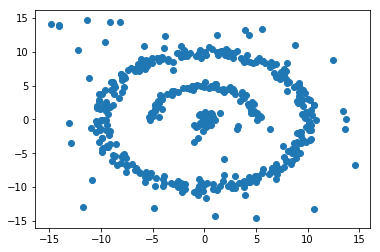

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('Dataset2.csv') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    data = np.array(data[1:], dtype=np.float)
    
plt.scatter(data[:,0],data[:,1])
plt.show()

In [6]:
from sklearn.cluster import DBSCAN as skDBSCAN
from sklearn import metrics

def DBSCAN(X,eps,minPts):
    db = skDBSCAN(eps=eps, min_samples=minPts).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

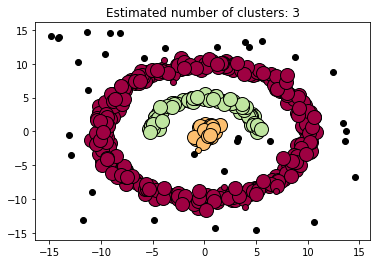

Silhouette Coefficient: -0.134


In [7]:
DBSCAN(data,1.5,5)

In [19]:
def initialize_centers(X,K):
    C = []
    for i in range(K):
        C_x = np.random.random_sample()*4 - 2
        C_y = np.random.random_sample()*4 - 2
        C.append([C_x,C_y])
    return C

def find_closest_centers(X,C):
    idx = []
    for d in X:
        bestDist = np.Infinity
        bestIndex = -1
        for i in range(len(C)):
            center = C[i]
            dist = np.linalg.norm(d-center)
            if dist < bestDist:
                bestDist = dist
                bestIndex = i
        idx.append(bestIndex)
    return idx

def compute_means(X,idx,K,C):
    sumc = np.zeros((K,2))
    count = np.zeros(K)
    for i in range(len(X)):
        d = X[i]
        di = idx[i]
        sumc[di] = [sumc[di][0] + d[0],sumc[di][1] + d[1]]
        count[di] += 1
    newcenters = np.zeros((K,2))
    for i in range(K):
        if count[i] != 0:
            newcenters[i] = [sumc[i][0] / count[i],sumc[i][1] / count[i]]
        else:
            newcenters[i] = C[i]
    return newcenters

#KMeans
def KMeans(k,n,plot=True):
    centers = initialize_centers(data,k)
    for i in range(n):
        idx = find_closest_centers(data,centers)
        centers = compute_means(data,idx,k,centers)

    if plot:
        plt.scatter(data[:,0],data[:,1],c=idx)
        plt.show()
    
    #Print Silhouette Score
    sum_sil = 0
    for i in range(len(data)):
        sum_dist = 0
        c = 0
        for j in range(len(data)):
            if idx[i]==idx[j] and i != j:
                sum_dist += np.linalg.norm(data[i]-data[j])
                c += 1
        a_score = sum_dist / c
        
        b_score = np.Infinity
        for kn in range(k):
            sum_nei_dist = 0
            c = 0
            for j in range(len(data)):
                if idx[j]==kn:
                    sum_nei_dist += np.linalg.norm(data[i]-data[j])
                    c += 1
            avg_nei_dist = sum_nei_dist / c
            if avg_nei_dist < b_score:
                b_score = avg_nei_dist
                
        if a_score < b_score:
            s_score = 1 - a_score / b_score
        elif a_score == b_score:
            s_score = 0
        else:
            s_score = b_score / a_score - 1
        
        sum_sil += s_score
    
    sil = sum_sil / len(data)
    
    print("Silhouette Coefficient: %0.3f"
      % sil)
        

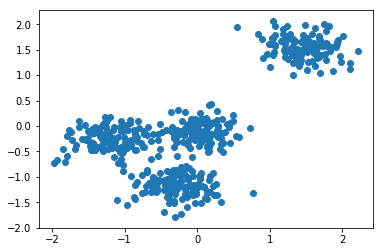

In [47]:
with open('Dataset1.csv') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    data = np.array(data[1:], dtype=np.float)
    
plt.scatter(data[:,0],data[:,1])
plt.show()

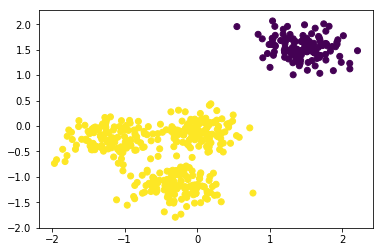

Silhouette Coefficient: -0.004


In [48]:
KMeans(2,5)

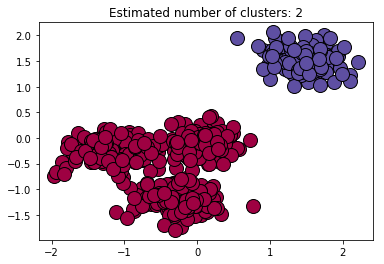

Silhouette Coefficient: 0.693


In [49]:
DBSCAN(data,1,5)

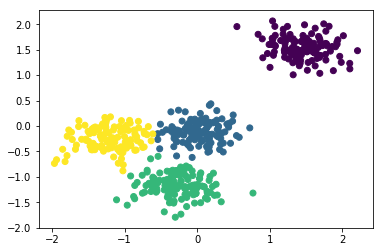

Silhouette Coefficient: -0.008


In [50]:
KMeans(4,8)

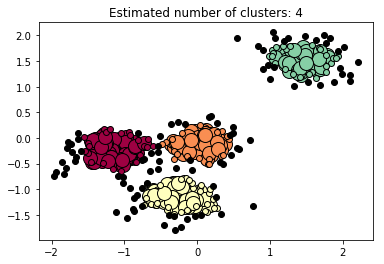

Silhouette Coefficient: 0.445


In [51]:
DBSCAN(data,0.15,10)

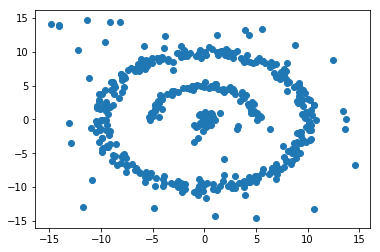

In [52]:
with open('Dataset2.csv') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    data = np.array(data[1:], dtype=np.float)
    
plt.scatter(data[:,0],data[:,1])
plt.show()

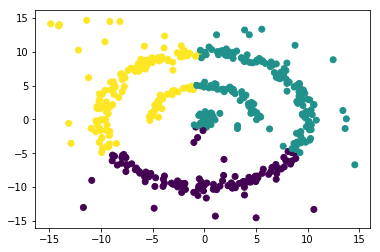

Silhouette Coefficient: -0.007


In [53]:
KMeans(3,8)

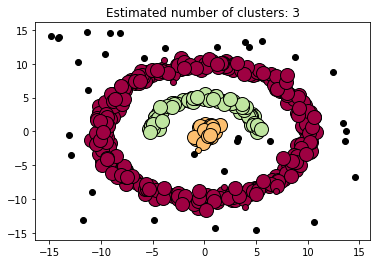

Silhouette Coefficient: -0.134


In [54]:
DBSCAN(data,1.5,5)